In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

# Regression

## Relationships

- deterministic (such as Celius <-> Fahrenheit) - these are exact
- statistical (height & weight) - displays scatter or trend in graph

## Notation

> Greek letters express variables in the population
> $Y_i = \alpha + \beta(x_i - \bar{x}) + \epsilon_i$ 

> Latin characters express variables in the sample
> $y_i = a + b(x_i - \bar{x}) + e_i$ 

> bar expresses the calculated mean
> $\bar{x}$

> hat expresses the expected value (best fit, i.e. regression line)
> $\hat{y}$

## Linear Regression Equation
*line of best fit*

$Y=a+bX$ <br/>
where Y is the *dependent* (or response, outcome) variable, and X is the *independent* (or predictor/explanatory) variable.

$\displaystyle a = \frac{ (\sum y)(\sum x^2) - (\sum x)(\sum xy) }{ n(\sum x^2) - (\sum x)^2}$<br/>

$\displaystyle b = \frac{ n(\sum xy) - (\sum x)(\sum y) }{ n(\sum x^2) - (\sum x)^2}$



### Derivation

- let $x_i$ be the ith predictor value (x axis)
- let $y_i$ be the ith observed value (y axis)
- let $\hat{y}_i$ be the ith predicted value using a regression line (y value of the line of best fit)

#### Find the least error
*The error between observation and prediction needs to be a low as possible*
- $e_i = y_i - \hat{y}_i$

Squaring the sum of errors allows us to express the optimal value - the least squares criterion

$\displaystyle\sum_{i=1}^{n} e_i^2$

*This is better than using summing the absolute value, as squaring not only creates positive values, it is supported better with calculus*

*So, we need to find the best fitted line, a.k.a the values a and b, where  $\hat{y}_i = mx_i + c$. We can express the sum of values in terms found in the aforementioned linear formula*

$\displaystyle\begin{split}
Q &= \sum_{i=1}^{n} e_i^2 \\ 
             &= \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 \\ 
             &= \sum_{i=1}^{n} \big(y_i - (a + bx_i) \big)^2 \\ 
\end{split}$

*Instead of finding 'a' the intercept, which isn't useful for many statistical analysis (i.e. height and weight won't ever become 0), we use the arithmetic mean of x and y as the origin.*

$\hat{y}_i = a + b(x_i - \bar{x})$

#### Find the minimum intercept
To find the minimum with respects to a, the intercept, solve the derivative at 0

$\displaystyle\begin{split}
Q &= \sum_{i=1}^{n} \Big(y_i - \big(a + b(x_i - \bar{x}) \big) \Big)^2  \\ 
& \text{     using chain rule: } f = g \circ h (x) \implies f^\prime = g^\prime \circ h(x) \cdot h^\prime(x) \\
& \text{     where } g(x) = \sum_{i=1}^n ( x_i^2 )\text{, and  } h(x) = \Big(y_i - \big(a + b(x_i - \bar{x}) \big) \Big) \\
\frac{dQ}{da} &= 2\sum_{i=1}^{n} \Big(y_i - \big(a + b(x_i - \bar{x}) \big) \Big) (-1) \equiv 0 \\
&= - \sum_{i=1}^n y_i + \sum_{i=1}^n a + b \sum_{i=1}^n (x_i - \bar{x}) \equiv 0 \\
& \text{as } \sum_{i=1}^n a = na \text{. and } \sum_{i=1}^n (x_i - \bar{x}) = 0 \\
&= - \sum_{i=1}^n y_i + na \equiv 0 \\
a &= \frac{1}{n} \sum\limits_{i=1}^n y_i \\
  &= \bar{y} \\
  & \text{ a is the mean of all y values at the minimum/best fit, when the mean of all x's is taken as the mid point} \\
Q &= \sum_{i=1}^{n} \Big(y_i - \big( \bar{y} + b(x_i - \bar{x}) \big) \Big)^2  \\ 
\end{split}$

#### Find the minimum slope
To find the minimum with respects to b, the slope, solve the derivative at 0

$\displaystyle\begin{split}
Q &= \sum_{i=1}^{n} \Big(y_i - \big( \bar{y} + b(x_i - \bar{x}) \big) \Big)^2  \\ 
& \text{using chain rule: } f = g \circ h (x) \implies f^\prime = g^\prime \circ h(x) \cdot h^\prime(x) \\
& \text{where } g(x) = \sum_{i=1}^n ( x_i^2 )\text{, and  } h(x) = \Big(y_i - \big( \bar{y} + b(x_i - \bar{x}) \big) \\
\frac{dQ}{db} &= 2\sum_{i=1}^{n} \Big(y_i - \big( \bar{y} + b(x_i - \bar{x}) \big) \Big) \cdot - (x_i - \bar{x}) \equiv 0 \\
 &= - \sum_{i=1}^{n} (y_i -  \bar{y})(x_i - \bar{x}) + b \sum_{i=1}^{n} (x_i - \bar{x})(x_i - \bar{x}) \equiv 0 \\
 & b \sum_{i=1}^{n} (x_i - \bar{x})^2 = \sum_{i=1}^{n} (y_i -  \bar{y})(x_i - \bar{x}) \\
 b &= \frac{ \sum_{i=1}^{n} (x_i - \bar{x})(y_i -  \bar{y}) }{  \sum_{i=1}^{n} (x_i - \bar{x})^2 } \\
\end{split}$


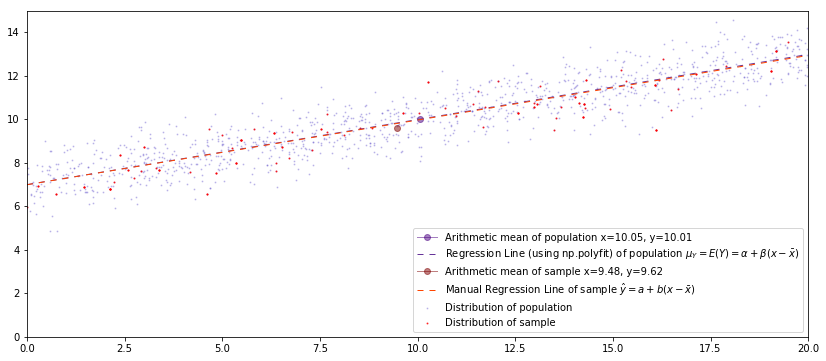

In [46]:
# Regression Line
SIZE = 1200
SAMPLE_SIZE = 120

# Generate random variables for our population
M = 0.3
C = 3.0
x = np.random.uniform(size=SIZE) * 20
y = 10.0 + np.random.normal(scale=0.8, size=SIZE)
y = y+(x*M-C)

# get midpoint
x_mean_pop = x.sum() / x.size
y_mean_pop = y.sum() / y.size

# Take a random sample for analysis
sample = np.random.choice(range(SAMPLE_SIZE), 120)
x_sample = x[sample]
y_sample = y[sample]
x_mean_sample = x_sample.sum() / x_sample.size
y_mean_sample = y_sample.sum() / y_sample.size

# Manual Way to get intercept and slope for our sample
nom = np.fromfunction(lambda i: (x_sample[i] - x_mean_sample) * (y_sample[i] - y_mean_sample), shape = (SAMPLE_SIZE,), dtype=np.int )
denom = np.fromfunction(lambda i: (x_sample[i] - x_mean_sample) ** 2, shape = (SAMPLE_SIZE,), dtype=np.int )
slope_sample = nom.sum() / denom.sum()
intercept_sample = y_mean - slope_sample*x_mean

# The Numpy way for our population
slope_pop, intercept_pop = np.polyfit(x, y, 1)

# build ab line
abline_x = np.linspace(0,20.0,20)
abline_values_pop = [slope_pop * i + intercept_pop for i in abline_x]
abline_values_sample = [slope_sample * i + intercept_sample for i in abline_x]

plt.figure(figsize=(14,6))
plt.margins(0,0)
plt.title('')

plt.plot(x_mean_pop, y_mean_pop, color='indigo', lw=1, alpha=0.5, marker='o', label='Arithmetic mean of population x={:0.2f}, y={:0.2f}'.format(x_mean_pop, y_mean_pop))
plt.scatter(x, y, color='slateblue', s=1, lw=1, alpha=0.3, label='Distribution of population')
plt.plot(abline_x, abline_values_pop, color='rebeccapurple', lw=1, alpha=1.0, dashes =(6,6), label=r'Regression Line (using np.polyfit) of population $\mu_Y = E(Y) = \alpha + \beta(x-\bar{x})$')

plt.plot(x_mean_sample, y_mean_sample, color='maroon', lw=1, alpha=0.5, marker='o', label='Arithmetic mean of sample x={:0.2f}, y={:0.2f}'.format(x_mean_sample, y_mean_sample))
plt.scatter(x_sample, y_sample, color='red', s=1, lw=1, alpha=0.7, label='Distribution of sample')
plt.plot(abline_x, abline_values_sample, color='orangered', lw=1, alpha=1.0, dashes =(6,6), label=r'Manual Regression Line of sample $\hat{y} = a + b(x-\bar{x})$')

plt.xlim((0,20.0))
plt.ylim((0,15.0))
plt.legend()
plt.show()


----

## The Simple Linear Regression Model

We can define this with $ \mu_Y = E(Y) = \alpha + \beta(x-\bar{x})$

Also, consider each data point deviates from the regression line by $\epsilon_i$ would suggest $Y_i = \alpha + \beta(x - \bar{x}) + \epsilon_i$

We don't have the luxury of calculating $\alpha$ and $\beta$ in the population, so we calculate a and b from the sample instead. $\hat{y}_i = a+b(x_i - \bar{x})$

Use this model, when you can make the following assumptions (LINE)
- The mean of the responses $E(Y_i)$ is a **L**inear function of $x_i$
- The errors, $\epsilon_i$, and hence the responses $Y_i$ are **I**ndependent
- The errors, $\epsilon_i$, and hence the responses $Y_i$ are **N**ormally Distributed
- The errors, $\epsilon_i$, and hence the responses $Y_i$ have **E**qual variances ($\sigma^2$) for all x values

We can see the line defines best fit, but does not express the dispersion or how the values are dsitributed. We need to expand our model to define the distribution.

![Simple Linear Regression Illustration][i1]


### References
 - [Pen State - Stats - The Model][r1]
 

[r1]: https://newonlinecourses.science.psu.edu/stat414/node/279/
[i1]: https://newonlinecourses.science.psu.edu/stat414/sites/onlinecourses.science.psu.edu.stat414/files/lesson35/Less35_Graph16/index.gif

----

### Simple Linear Regression Model Proof

Simple Linear Regression Mode states that the errors $\epsilon_i$, are independent and normally distributed with mean 0 and variance $\sigma^2$ :  $\epsilon_i \sim N(0, \sigma^2) $ ($N$ is the normal distribution function)

The linearity condition: $Y_i = \alpha + \beta(x - \bar{x}) + \epsilon_i$

therefore implies that: $Y_i \sim N\Big( \alpha + \beta(x - \bar{x}) , \sigma^2 \Big)$

Considering the normal distribution function $f(x| \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{- \frac{(x-\mu)^2}{2\sigma^2} }$, where $\sigma^2$ is the variance, and $\mu$ is the mean

Therefore the likelihood function is: $L_{Y_i}(\alpha, \beta, \sigma^2) = \prod\limits_{i=1}^n \frac{1}{\sqrt{2\pi} \sigma} \exp \Bigg[ - \frac{ \big(Y_i - \alpha - \beta(x_i - \bar{x})\big)^2}{ 2\sigma^2} \Bigg]$

Which can be rewritten as: $L = (2\pi)^{-\frac{n}{2}}(\sigma^2)^{-\frac{n}{2}} \exp \Bigg[ - \frac{1}{2\sigma^2} \sum\limits_{i=1}^{n} \big(Y_i - \alpha - \beta(x_i - \bar{x}) \big)^2 \Bigg]$

Take log on both sides, we get: $\log{(L)} = -\frac{n}{2}\log{(2\pi)} - \frac{n}{2}\log{(\sigma^2)} \;\;\;-\;\;\; \frac{1}{2\sigma^2} \sum\limits_{i=1}^n \big( Y_i - \alpha - \beta(x_i - \bar{x}) \big)^2$

Now, that negative sign in the front of that summation on the right hand side tells us that the only way we can maximize $\log L(\alpha, \beta, \sigma^2)$ with respect to $\alpha$ and $\beta$ is if we minimize $\sum\limits_{i=1}^n \big( Y_i - \alpha - \beta(x_i - \bar{x}) \big)^2$ with respect to $\alpha$ and $\beta$ - Which is the least squares criterion. Therefore the Maximum Liklihood (ML) estimators of $\alpha$ and $\beta$ must be the same as the least squares estimators $\alpha$ and $\beta$.

### References
 - [Pen State - Stats - The Model][r1]
 

[r1]: https://newonlinecourses.science.psu.edu/stat414/node/279/


----
## Variance $\sigma^2$

![Probability Density][i2]

We would estimate the population variance $\sigma^2$ using the sample variance $s^2$

$s^2 = \frac{1}{n-1} \sum\limits_{i=1}^{n} (Y_i - \bar{Y})^2$

If we had multiple populations, for example,

![PD for Multiple Populations][i3]

To estimate the common variance amongst many populations, we can calculate biased and unbiased.

Biased estimator: $\hat{\sigma}^2 = \frac{1}{n} \sum\limits_{i=1}^{n} (Y_i - \hat{Y_i})^2$

Unbiased/ Mean Square Estimator: $ MSE = \frac{1}{n-2} \sum\limits_{i=1}^{n} (Y_i - \hat{Y_i})^2$


These are needed to derive confidence levels for $\alpha$ and $\beta$.

[i2]: https://newonlinecourses.science.psu.edu/stat414/sites/onlinecourses.science.psu.edu.stat414/files/lesson35/Less35_Graph19/index.gif
[i3]: https://newonlinecourses.science.psu.edu/stat414/sites/onlinecourses.science.psu.edu.stat414/files/lesson35/Less35_Graph20b/index.gif

### Proof: Variance Biased Estimator

We have shown that  $\log{(L)} = -\frac{n}{2}\log{(2\pi)} - \frac{n}{2}\log{(\sigma^2)} \;\;\;-\;\;\; \frac{1}{2\sigma^2} \sum\limits_{i=1}^n \big( Y_i - \alpha - \beta(x_i - \bar{x}) \big)^2$

To maximize this value, we need the derivative with respects to $\sigma^2$:

$\displaystyle\begin{split}
\frac{\partial L_{Y_i}(\alpha, \beta, \sigma^2)}{\partial \sigma^2} &= -n\frac{n}{2\sigma^2} - \frac{1}{2} \sum\limits_{i=1}^n \big(  Y_i - \alpha - \beta(x_i - \bar{x})  \big)^2 \cdot \Bigg( - \frac{1}{(\sigma^2)^2} \Bigg) \equiv 0 \text{ at maximum} \\
& \text{ multiply by }2(\sigma^2)^2 \\
& \therefore - n\sigma^2 + \sum\limits_{i=1}^n \big(  Y_i - \alpha - \beta(x_i - \bar{x})  \big)^2 = 0 \\
\hat{\sigma}^2 &= \frac{1}{n} \sum\limits_{i=1}^n \big(  Y_i - \alpha - \beta(x_i - \bar{x})  \big)^2 \\
&= \frac{1}{n} \sum\limits_{i=1}^n \ (  Y_i - \hat{Y_i} )^2
\end{split}$



## Confidence Intervals

$$